# HOUSING ANALYSIS

In [2]:
# the objective of this project is to build a predictive model by using a linear regression to estimate a numerical outcome

In [3]:
#before i proceed i will firstly import my dataset which will help me understand and have a proper overview of what my data is saying

# Data Importation

In [5]:
import pandas as pd
Data = pd.read_csv('Housing.csv')

In [6]:
Data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
Data.isnull().sum # checked for duplicates

<bound method DataFrame.sum of      price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    False  False     False      False    False     False      False   
1    False  False     False      False    False     False      False   
2    False  False     False      False    False     False      False   
3    False  False     False      False    False     False      False   
4    False  False     False      False    False     False      False   
..     ...    ...       ...        ...      ...       ...        ...   
540  False  False     False      False    False     False      False   
541  False  False     False      False    False     False      False   
542  False  False     False      False    False     False      False   
543  False  False     False      False    False     False      False   
544  False  False     False      False    False     False      False   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0       False            False    

In [8]:
Data2 = Data.copy()

In [9]:
print("Duplicates before removal:", Data.duplicated().sum())

Duplicates before removal: 0


In [10]:
Data.value_counts('bedrooms')

bedrooms
3    300
2    136
4     95
5     10
1      2
6      2
Name: count, dtype: int64

In [11]:
Data.value_counts('prefarea')

prefarea
no     417
yes    128
Name: count, dtype: int64

In [12]:
Data.value_counts('furnishingstatus')

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [13]:
Data.info() # This helped me check for incorrect datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
Data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Renaming column names
this enabled me or an external body understand what each column is talking about 

In [16]:
Data=Data.rename({'furnishing status':'furnishing_status'}, axis=1)

In [17]:
Data=Data.rename({'hotwaterheating':'hot_water_heater'}, axis=1)

In [18]:
Data=Data.rename({'airconditioning':'air_conditioning'}, axis=1)

In [19]:
Data=Data.rename({'mainroad':'main_road'}, axis=1)

In [20]:
Data=Data.rename({'prefarea':'preferred_area'}, axis=1)

In [21]:
Data

,price,area,bedrooms,bathrooms,stories,main_road,guestroom,basement,hot_water_heater,air_conditioning,parking,preferred_area,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Checking for outliers

<Axes: ylabel='price'>

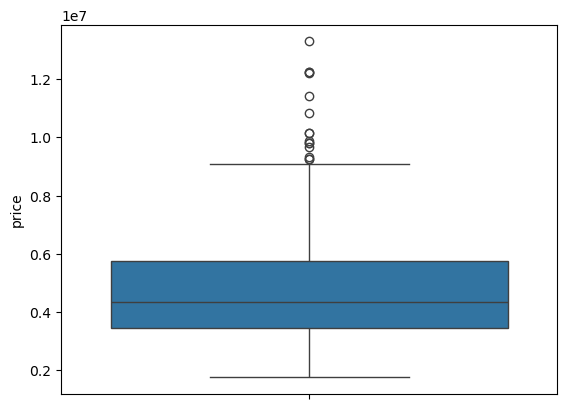

In [23]:
import seaborn as sns
sns.boxplot(data=Data['price'])  #checked for outliers on the price column


# Removing Outliers

In [25]:
Q1 = Data['price'].quantile(0.25)
Q3 = Data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

Data = Data[(Data['price'] >= lower_limit) & (Data['price'] <= upper_limit)]

<Axes: ylabel='price'>

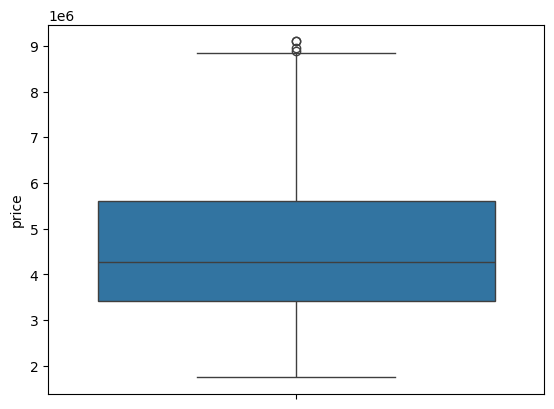

In [26]:
sns.boxplot(data=Data['price'])

In [27]:
Data = Data[(Data['area'] >= lower_limit) & (Data['area'] <= upper_limit)]

<Axes: ylabel='area'>

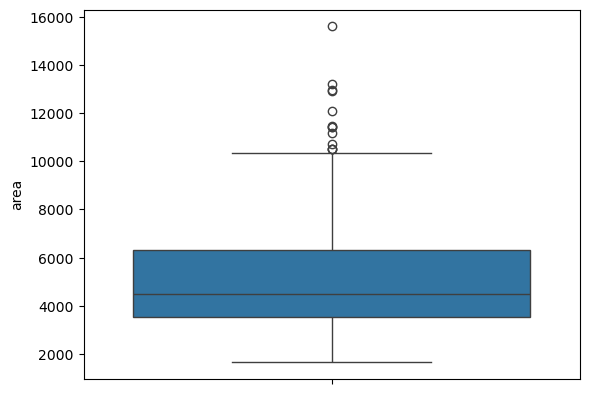

In [28]:
sns.boxplot(data=Data['area'])

In [29]:
k1 = Data['area'].quantile(0.25)
k3 = Data['area'].quantile(0.75)
IQR = k3 - k1

lower_bound = k1 - 1.5 * IQR
upper_bound = k3 + 1.5 * IQR

Data = Data[(Data['area'] >= lower_bound) & (Data['area'] <= upper_bound)]

<Axes: ylabel='area'>

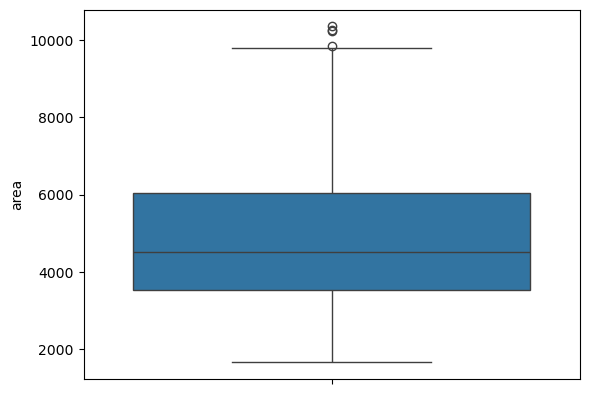

In [30]:
sns.boxplot (data=Data['area'])

<function matplotlib.pyplot.show(close=None, block=None)>

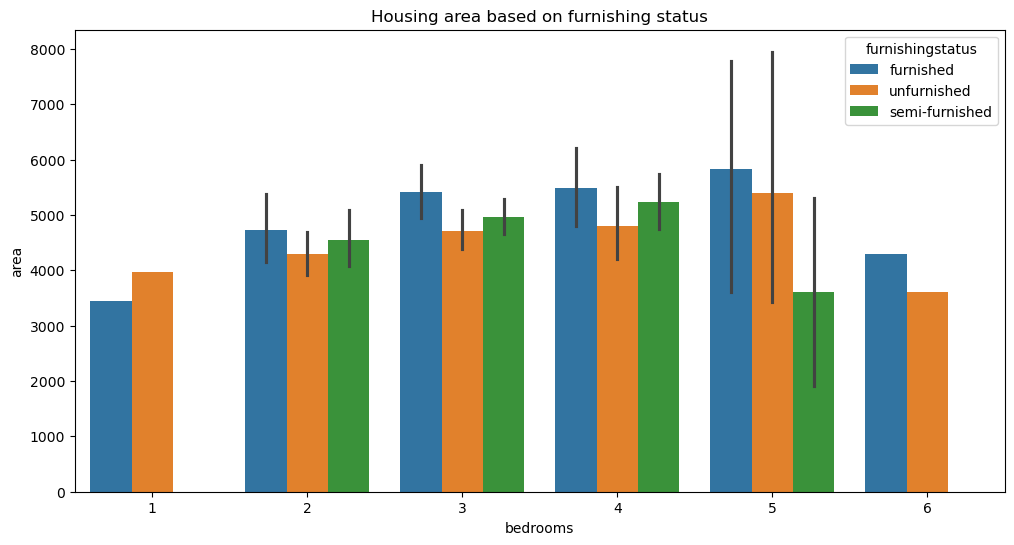

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
sns.barplot(data=Data, x="bedrooms", y="area",hue="furnishingstatus")
plt.title("Housing area based on furnishing status")
plt.xlabel("bedrooms")
plt.ylabel("area")
plt.legend(title="furnishingstatus")
plt.show

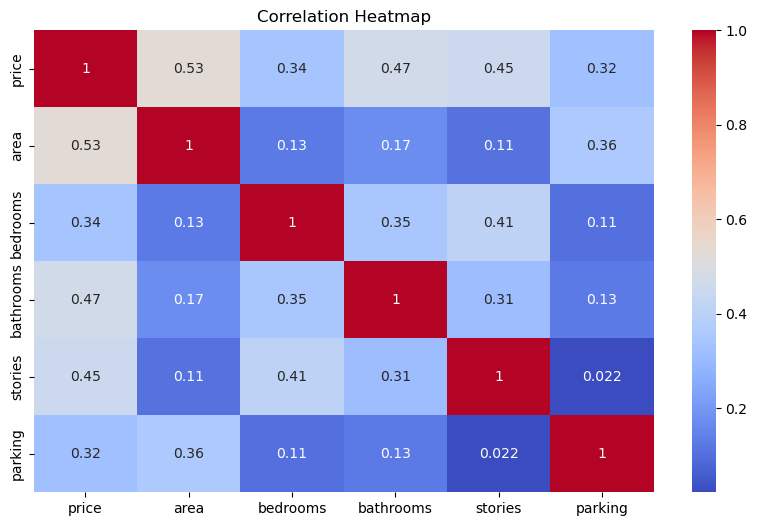

In [32]:
#checking for corelationship 
plt.figure(figsize=(10, 6))
sns.heatmap(Data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [33]:
len(Data) #helps check 

517

In [34]:
Data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
main_road           0
guestroom           0
basement            0
hot_water_heater    0
air_conditioning    0
parking             0
preferred_area      0
furnishingstatus    0
dtype: int64

In [35]:
Data.duplicated()

15     False
16     False
17     False
18     False
19     False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 517, dtype: bool

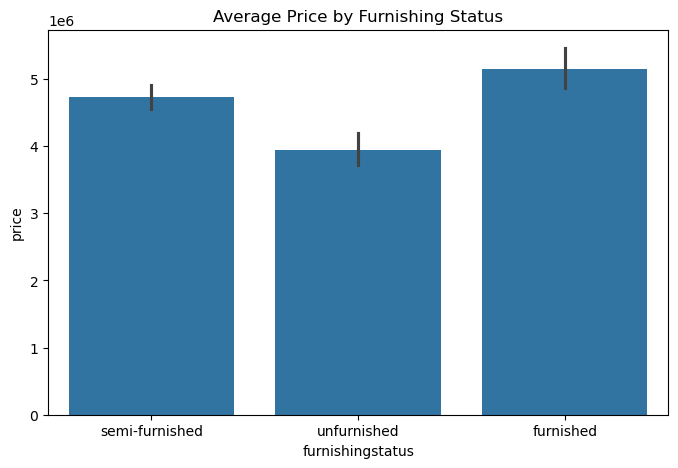

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(data=Data, x='furnishingstatus', y='price')
plt.title("Average Price by Furnishing Status")
plt.show()

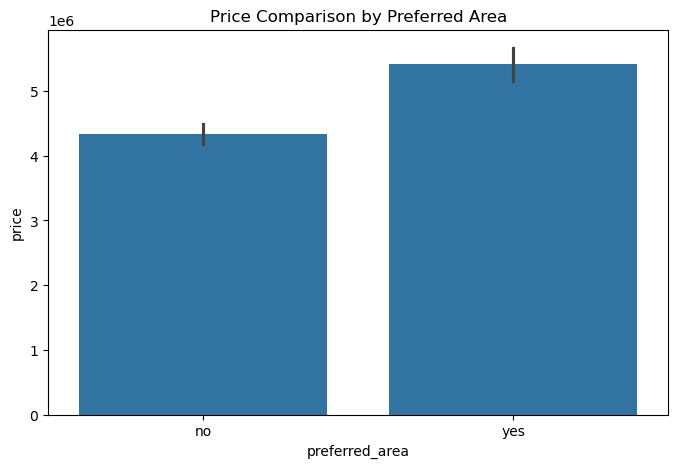

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(data=Data, x='preferred_area', y='price')
plt.title("Price Comparison by Preferred Area")
plt.show()

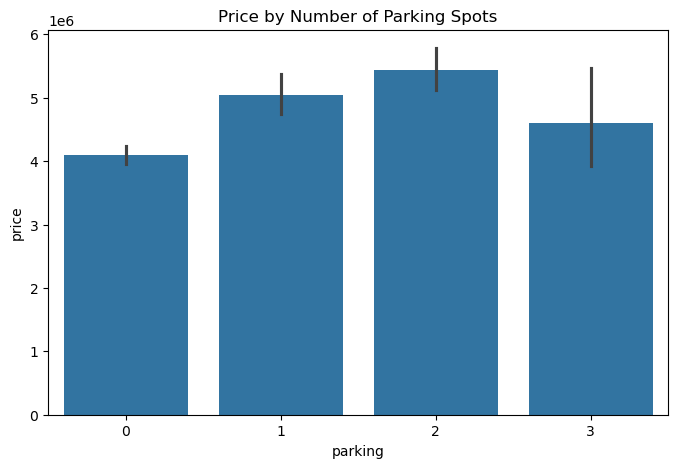

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(data=Data, x='parking', y='price')
plt.title("Price by Number of Parking Spots")
plt.show()

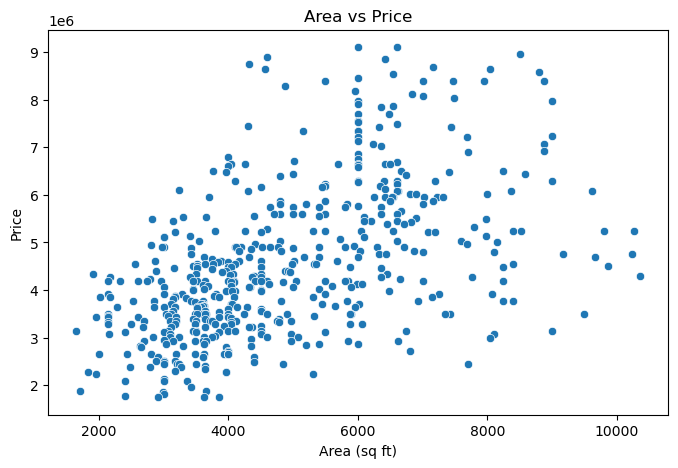

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=Data, x='area', y='price')
plt.title("Area vs Price")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.show()

In [87]:
Data

,price,area,bedrooms,bathrooms,stories,main_road,guestroom,basement,hot_water_heater,air_conditioning,parking,preferred_area,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [93]:
Data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.170000e+02,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.568873e+06,4890.108317,2.941973,1.261122,1.794971,0.653772
std,1.594826e+06,1779.173101,0.731701,0.465368,0.865205,0.843380
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.395000e+06,3520.000000,2.000000,1.000000,1.000000,0.000000
50%,4.235000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.530000e+06,6050.000000,3.000000,1.000000,2.000000,1.000000
max,9.100000e+06,10360.000000,6.000000,3.000000,4.000000,3.000000


In [95]:
# Encoding 
# To enable me encode since i have many values i will have to put them in category and to achieve this i will need my dictionary
furnishing_status1= {'unfinished': 0, 'semi-finished': 1, 'finished': 2}
prefered_area1= { 'yes': 0, 'no':1}
Air_conditioning1={ 'yes':0, 'no':1}



# i will Separate features (X) and target (y)
X = data_model.drop('price', axis=1)
y = data_model['price']

# Split Test Train

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train model

In [81]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 734127.1131194812
RMSE: 976818.173705269
R² Score: 0.6747673447811051


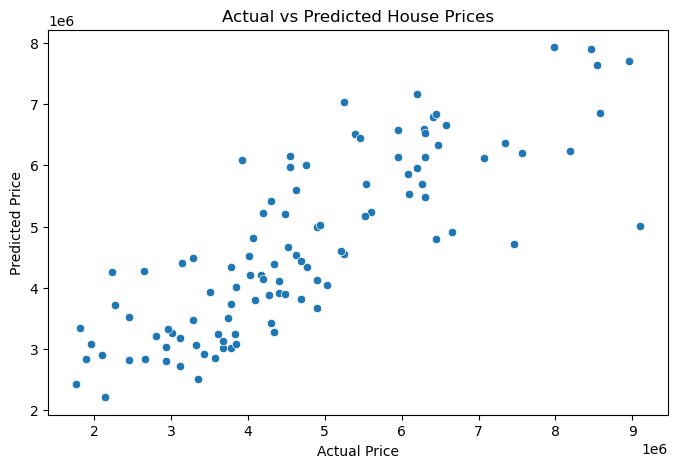

In [85]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [ ]:
encode my data today